In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-sales/Ecommerce_Sales_Data_2024_2025.csv


In [2]:
# lets import the dataset
df = pd.read_csv("/kaggle/input/e-commerce-sales/Ecommerce_Sales_Data_2024_2025.csv")
df

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,2024-06-25,Nishith Kulkarni,East,Kolkata,Books,Fiction,Fiction Veritatis,3,60671,0,182013.0,11853.15,Debit Card
4996,14997,2024-12-22,Aaina Chander,North,Jaipur,Toys,Doll,Doll Nulla,5,70048,0,350240.0,31237.23,Credit Card
4997,14998,2025-04-15,Dhanush Gara,South,Bangalore,Beauty,Lipstick,Lipstick Eaque,1,42162,15,35837.7,7827.50,Debit Card
4998,14999,2024-07-08,Divyansh Malhotra,East,Kolkata,Electronics,Smartwatch,Smartwatch Adipisci,4,13568,10,48844.8,6603.86,Credit Card


In [3]:
# LETS UNDERSTAND THE FEATURE OF DATASET
print(f"Shape of dataset {df.shape}")
print("==="*10)
print(f"Feature name are {list(df.columns)}")
print("==="*10)
print(f"datatypes of each feature \n {df.dtypes}")
print("==="*10)
print(f"numerical datatypes features are {df.select_dtypes(include = np.number).columns.tolist()}")
print("==="*10)
print(f"object datatypes feature are {df.select_dtypes(include = 'O').columns.tolist()}")
print("==="*10)
print(f"Information of dataset {df.info()}")
print("==="*10)
print(f"describtion of numerical columns \n {df.describe()}")
print("==="*10)
print(f"descrption for non integer columne \n{df.describe(include = 'O')}")
print("==="*10)


Shape of dataset (5000, 14)
Feature name are ['Order ID', 'Order Date', 'Customer Name', 'Region', 'City', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Unit Price', 'Discount', 'Sales', 'Profit', 'Payment Mode']
datatypes of each feature 
 Order ID           int64
Order Date        object
Customer Name     object
Region            object
City              object
Category          object
Sub-Category      object
Product Name      object
Quantity           int64
Unit Price         int64
Discount           int64
Sales            float64
Profit           float64
Payment Mode      object
dtype: object
numerical datatypes features are ['Order ID', 'Quantity', 'Unit Price', 'Discount', 'Sales', 'Profit']
object datatypes feature are ['Order Date', 'Customer Name', 'Region', 'City', 'Category', 'Sub-Category', 'Product Name', 'Payment Mode']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count 

In [4]:
# lets check for null values
print(df.isna().sum())


Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
dtype: int64


In [5]:
# lets understand the distribution of values in each feature 
df.nunique()

Order ID         5000
Order Date        730
Customer Name    4844
Region              4
City               20
Category           10
Sub-Category       50
Product Name     3835
Quantity            5
Unit Price       4841
Discount            5
Sales            4978
Profit           4996
Payment Mode        5
dtype: int64

In [6]:
# lets find out the insights 

# CUSTOMER NAME WHO HAS MORE THAN ONE ORDER

dff = df.groupby("Customer Name")["Order ID"].apply(list).reset_index()
dff["count"] = dff["Order ID"].apply(len)
dff = dff[dff["count"] > 1].sort_values(by="count", ascending=False).reset_index(drop=True)
dff

,Customer Name,Order ID,count
0,Aaryahi Madan,"[10556, 11677, 14055]",3
1,Vritika Cherian,"[10051, 10569, 13573]",3
2,Prerak Shere,"[10139, 14039]",2
3,Ojas Konda,"[10059, 11208]",2
4,Oorja Sur,"[10132, 12832]",2
...,...,...,...
149,Gatik Savant,"[11527, 13163]",2
150,Gokul Dixit,"[11641, 14250]",2
151,Heer Tara,"[13568, 14819]",2
152,Inaaya Doshi,"[12237, 13781]",2


In [7]:
print(f" number of product in each subcategories are \n{df.groupby('Sub-Category')['Product Name'].count()}")
print("======"*20)
print(f" number of product in each categories are \n{df.groupby('Category')['Product Name'].count()}")
print("======"*20)
print(f"unique categories in discount {df['Discount'].unique()}")
print("======"*20)
print(f"total number of product {df['Product Name'].nunique()}")
print("======"*20)
for x in df['Discount'].unique():
    print("======"*20)
    print(f"number of product who gets discount of {x} % are {df[df['Discount']== x]['Product Name'].nunique()}")

 number of product in each subcategories are 
Sub-Category
Accessories       95
Action Figure    100
Bed              117
Biography        116
Board Game        96
Cabinet           99
Camera            94
Chair             95
Clock             93
Comics            97
Cookware Set     116
Cricket Bat       89
Cushion           91
Doll              87
Dumbbells         97
Face Cream       102
Fiction          101
Football         120
Foundation        92
Headphones        96
Juicer           115
Kids Wear        100
Lamp             117
Laptop            91
Lipstick          95
Men's Wear       100
Microwave         96
Mixer Grinder     94
Mobile            94
Non-Fiction      114
Oil               93
Perfume           84
Puzzle            94
RC Car           101
Refrigerator     107
Rice              94
Shampoo           87
Shoes             98
Smartwatch        97
Sofa             122
Spices            97
Sugar             97
Table             94
Tennis Racket    106
Textbook         

# lets find out the region wise sale

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
# lets find out the region wise sale
x = df.groupby("Region")[["Sales","Profit"]].agg(["sum", "mean", "min", "max"])
x

Sales                                        Profit  \
                 sum           mean     min       max          sum   
Region                                                               
East    1.358116e+08  108130.284992  264.10  373500.0  20532558.12   
North   1.435782e+08  111473.793556  755.25  391910.0  21343004.33   
South   1.232302e+08  101424.005720  330.30  393580.0  18253049.32   
West    1.310460e+08  105597.077639  265.05  398485.0  19580123.14   

                                       
                mean    min       max  
Region                                 
East    16347.578121  19.12  76355.62  
North   16570.655536  40.74  82804.05  
South   15023.085860  44.57  87688.21  
West    15777.697937  23.25  89688.44

  Region      SalesSum      SalesMean  SalesMin  SalesMax    ProfitSum  \
0   East  1.358116e+08  108130.284992    264.10  373500.0  20532558.12   
1  North  1.435782e+08  111473.793556    755.25  391910.0  21343004.33   
2  South  1.232302e+08  101424.005720    330.30  393580.0  18253049.32   
3   West  1.310460e+08  105597.077639    265.05  398485.0  19580123.14   

     ProfitMean  ProfitMin  ProfitMax  
0  16347.578121      19.12   76355.62  
1  16570.655536      40.74   82804.05  
2  15023.085860      44.57   87688.21  
3  15777.697937      23.25   89688.44  


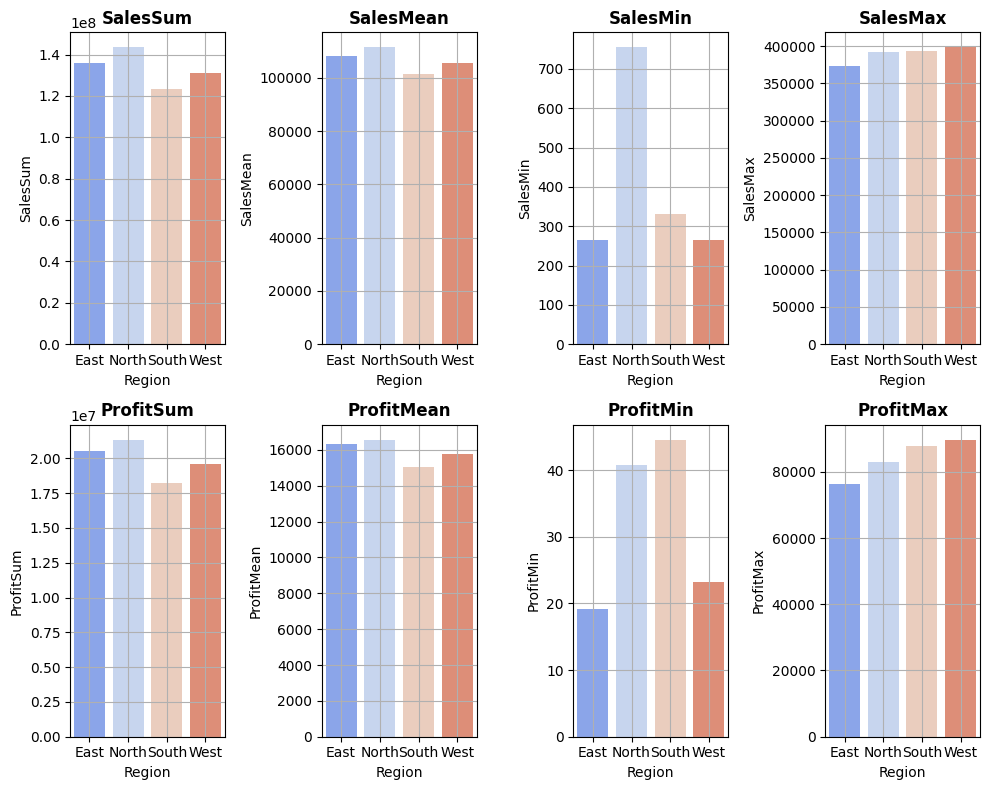

In [10]:
# df has columns: "Region", "Sales", "Profit"

x = df.groupby("Region").agg(
    SalesSum=("Sales", "sum"),
    SalesMean=("Sales", "mean"),
    SalesMin=("Sales", "min"),
    SalesMax=("Sales", "max"),
    ProfitSum=("Profit", "sum"),
    ProfitMean=("Profit", "mean"),
    ProfitMin=("Profit", "min"),
    ProfitMax=("Profit", "max")
).reset_index()

print(x)
plt.figure(figsize = (10,8))
# lets plot the bar plot for easy understanding
for i,col in enumerate(x.drop(columns = "Region"),1):
    plt.subplot(2,4,i)
    sns.barplot(x= "Region", y = col,data=x,palette = "coolwarm")
    plt.grid(True)
    plt.title(f"{col}",fontweight = 'bold')
plt.tight_layout()
plt.show()

### 📊 Observations from Regional Sales and Profit Data

- 💰 The **North region** has the highest total sales (~143.58 million), followed by **East** (~135.81 million), **West** (~131.05 million), and **South** (~123.23 million). South has the lowest total sales.

- 📈 Average sales per order are highest in the **North region** (~111,474) and lowest in **South** (~101,424), indicating that orders in North tend to be slightly larger.

- 📉 Maximum sales per order are similar across regions, with **West** having the highest (~398,485) and **East** also high (~373,500). Minimum sales vary more, with **East** having the lowest (~264.10).

- 🏆 The **North region** also has the highest total profit (~21.34 million), followed by **East** (~20.53 million), **West** (~19.58 million), and **South** (~18.25 million).

- 💵 Average profit per order is slightly higher in **North** (~16,571) and lowest in **South** (~15,023). Maximum profit per order is highest in **West** (~89,688), while **East** has some very low-profit orders (~19.12), showing high variability.

- 🌟 **Overall Insight**: North region leads in both total sales and profit, South lags behind. Regional differences in sales and profit highlight opportunities for targeted strategies in marketing and operations.


## City-Wise insights

                  City         sum          mean     min       max
0               Ranchi  4113313.69  17653.706824  112.32  76355.62
1              Lucknow  4523681.09  17332.111456   80.45  74570.86
2             Amritsar  4202631.34  16946.094113  316.04  73960.76
3            Bangalore  4416914.72  16923.044904   97.91  87688.21
4              Kolkata  3729700.69  16725.115202  233.48  75212.33
5               Jaipur  4353577.84  16680.374866   40.74  71866.56
6                Surat  4294995.22  16455.920383  151.42  67741.60
7          Bhubaneswar  4070957.02  16349.224980   69.23  71278.79
8                Delhi  3887734.46  16065.018430  127.44  75188.15
9                Patna  4131315.44  16012.850543   19.12  68446.84
10                Pune  3837310.46  15988.793583  139.35  71314.27
11          Chandigarh  4375379.60  15852.824638  198.27  82804.05
12              Mumbai  3743419.73  15597.582208  175.66  71420.71
13                 Goa  4027399.61  15549.805444   23.25  8968

<Figure size 4000x4000 with 0 Axes>

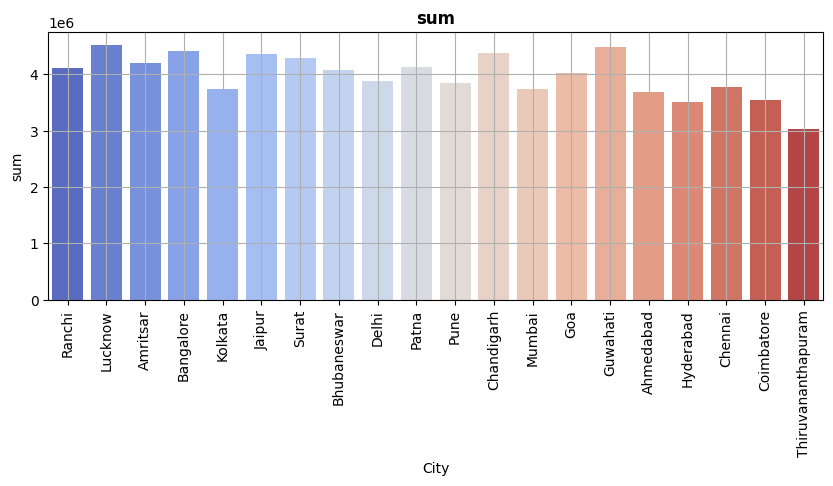

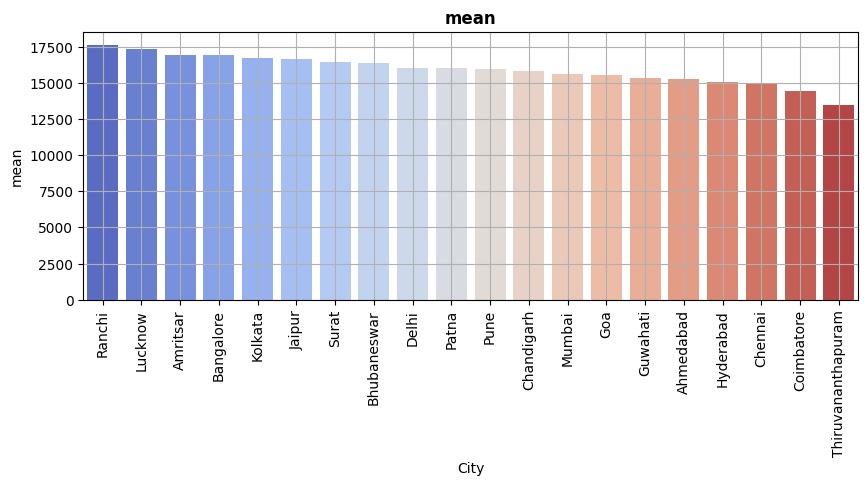

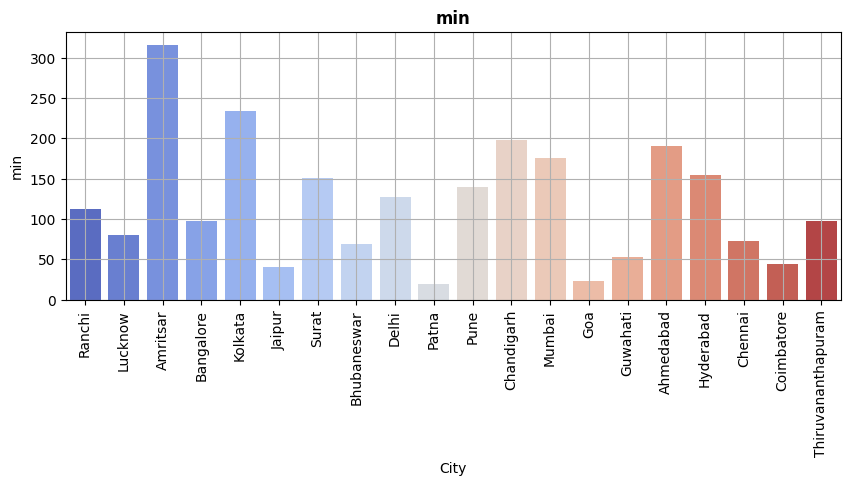

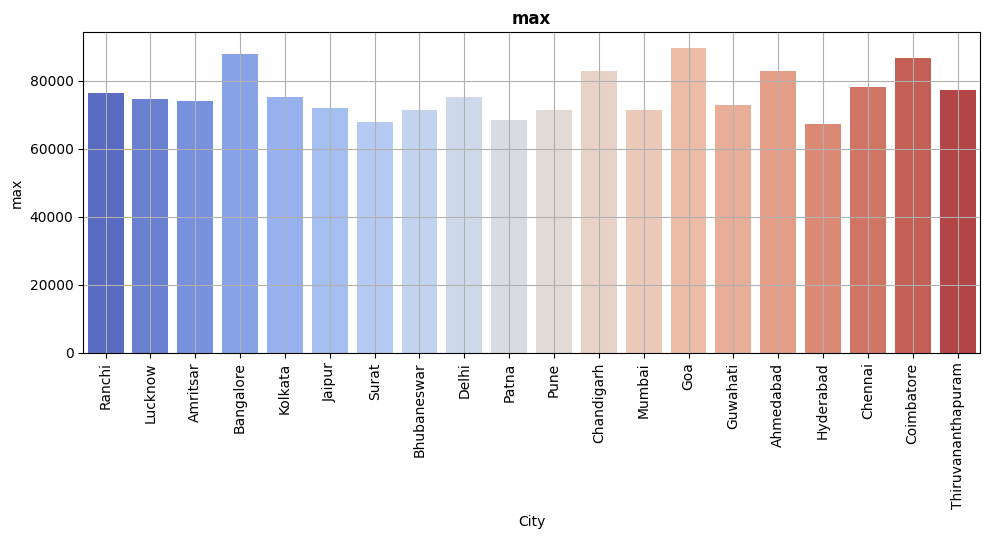

In [11]:
# lets find out city wise profit 
x = df.groupby("City")["Profit"].agg(["sum", "mean", "min", "max"]).sort_values(by ="mean",ascending = False).reset_index()
print(x)
# lets plot the grapth
plt.figure(figsize = (40,40))
# lets plot the bar plot for easy understanding
for i,col in enumerate(x.drop(columns = "City"),1):
    plt.figure(figsize = (10,16))
    plt.subplot(4,1,i)
    sns.barplot(x= "City", y = col,data=x,palette = "coolwarm")
    plt.grid(True)
    plt.title(f"{col}",fontweight = 'bold')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

                  City          sum           mean      min        max
0             Amritsar  28746184.20  115912.033065  1691.00  391910.00
1               Ranchi  26948513.25  115658.855150   485.10  373500.00
2            Bangalore  29989840.85  114903.604789   414.00  380045.00
3              Lucknow  29901483.40  114565.070498   981.60  382185.00
4               Jaipur  29319402.90  112334.877011   755.25  352179.25
5              Kolkata  24464634.15  109706.879596  1537.65  355720.00
6                Surat  28532934.65  109321.588697   792.00  398485.00
7                 Pune  26190830.95  109128.462292  1017.45  372330.00
8          Bhubaneswar  27088786.45  108790.307028   362.10  358385.00
9                Delhi  26280118.25  108595.529959   823.50  377297.25
10               Patna  27702815.20  107375.252713   264.10  359460.00
11          Chandigarh  29331057.35  106271.946920  1641.60  348222.50
12           Hyderabad  24301947.20  104749.772414   917.70  374035.00
13    

<Figure size 4000x4000 with 0 Axes>

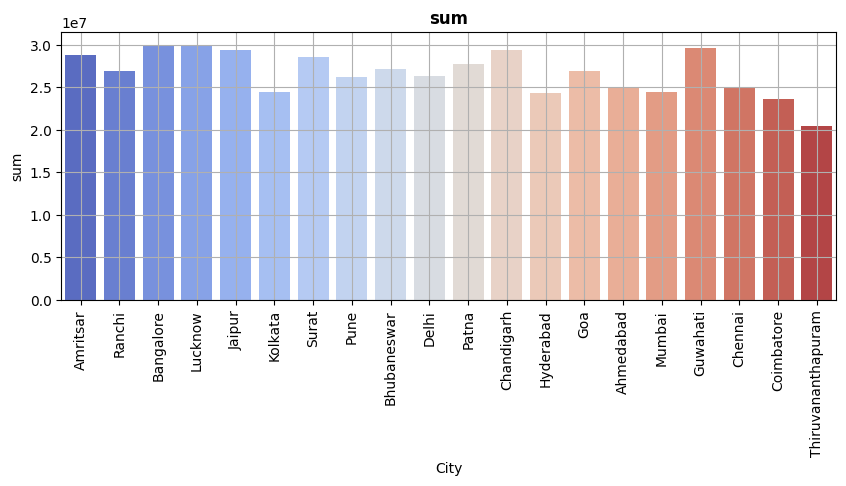

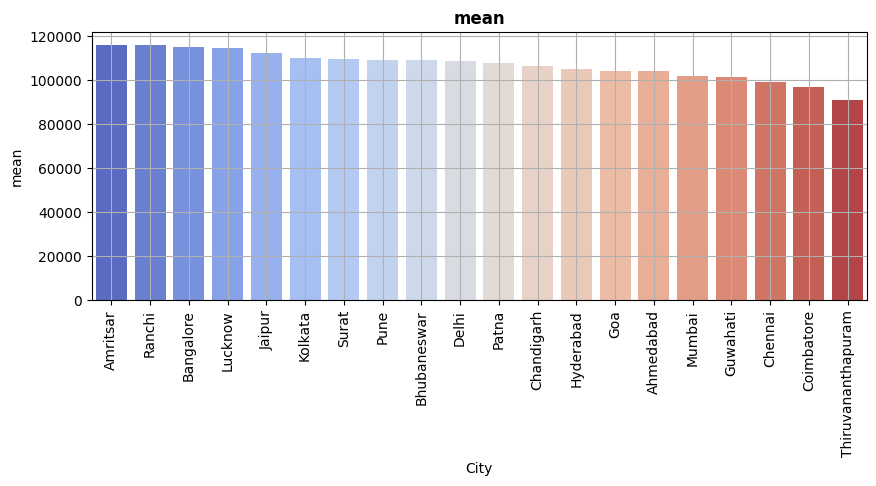

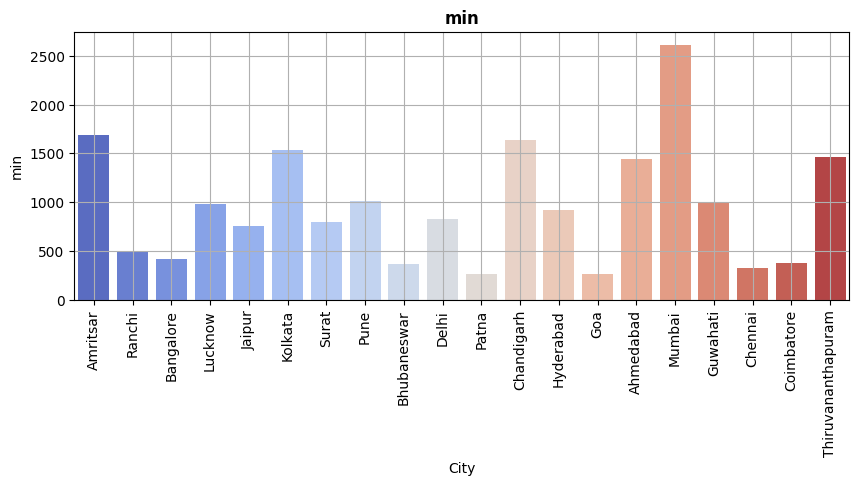

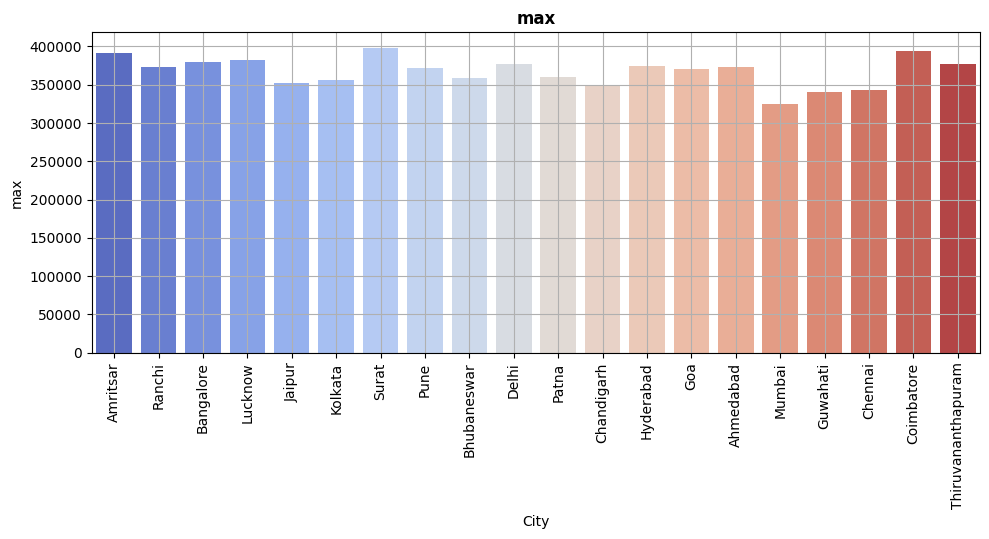

In [12]:
# lets find out city wise sales 
x = df.groupby("City")["Sales"].agg(["sum", "mean", "min", "max"]).sort_values(by ="mean",ascending = False).reset_index()
print(x)
# lets plot the grapth
plt.figure(figsize = (40,40))
# lets plot the bar plot for easy understanding
for i,col in enumerate(x.drop(columns = "City"),1):
    plt.figure(figsize = (10,16))
    plt.subplot(4,1,i)
    sns.barplot(x= "City", y = col,data=x,palette = "coolwarm")
    plt.grid(True)
    plt.title(f"{col}",fontweight = 'bold')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

                  City     Category     Profit
0            Ahmedabad    Furniture  565557.12
1            Ahmedabad   Home Decor  507296.61
2            Ahmedabad       Sports  446377.28
3             Amritsar     Clothing  674686.83
4             Amritsar       Sports  476885.29
5             Amritsar  Electronics  468661.80
6            Bangalore     Clothing  672593.63
7            Bangalore        Books  508715.92
8            Bangalore  Electronics  483341.01
9          Bhubaneswar    Groceries  532931.94
10         Bhubaneswar         Toys  467937.56
11         Bhubaneswar  Electronics  447496.94
12          Chandigarh   Home Decor  602324.54
13          Chandigarh    Groceries  538832.31
14          Chandigarh         Toys  488816.37
15             Chennai      Kitchen  691876.76
16             Chennai         Toys  539693.12
17             Chennai        Books  378722.20
18          Coimbatore   Home Decor  571977.95
19          Coimbatore       Sports  517234.71
20          C

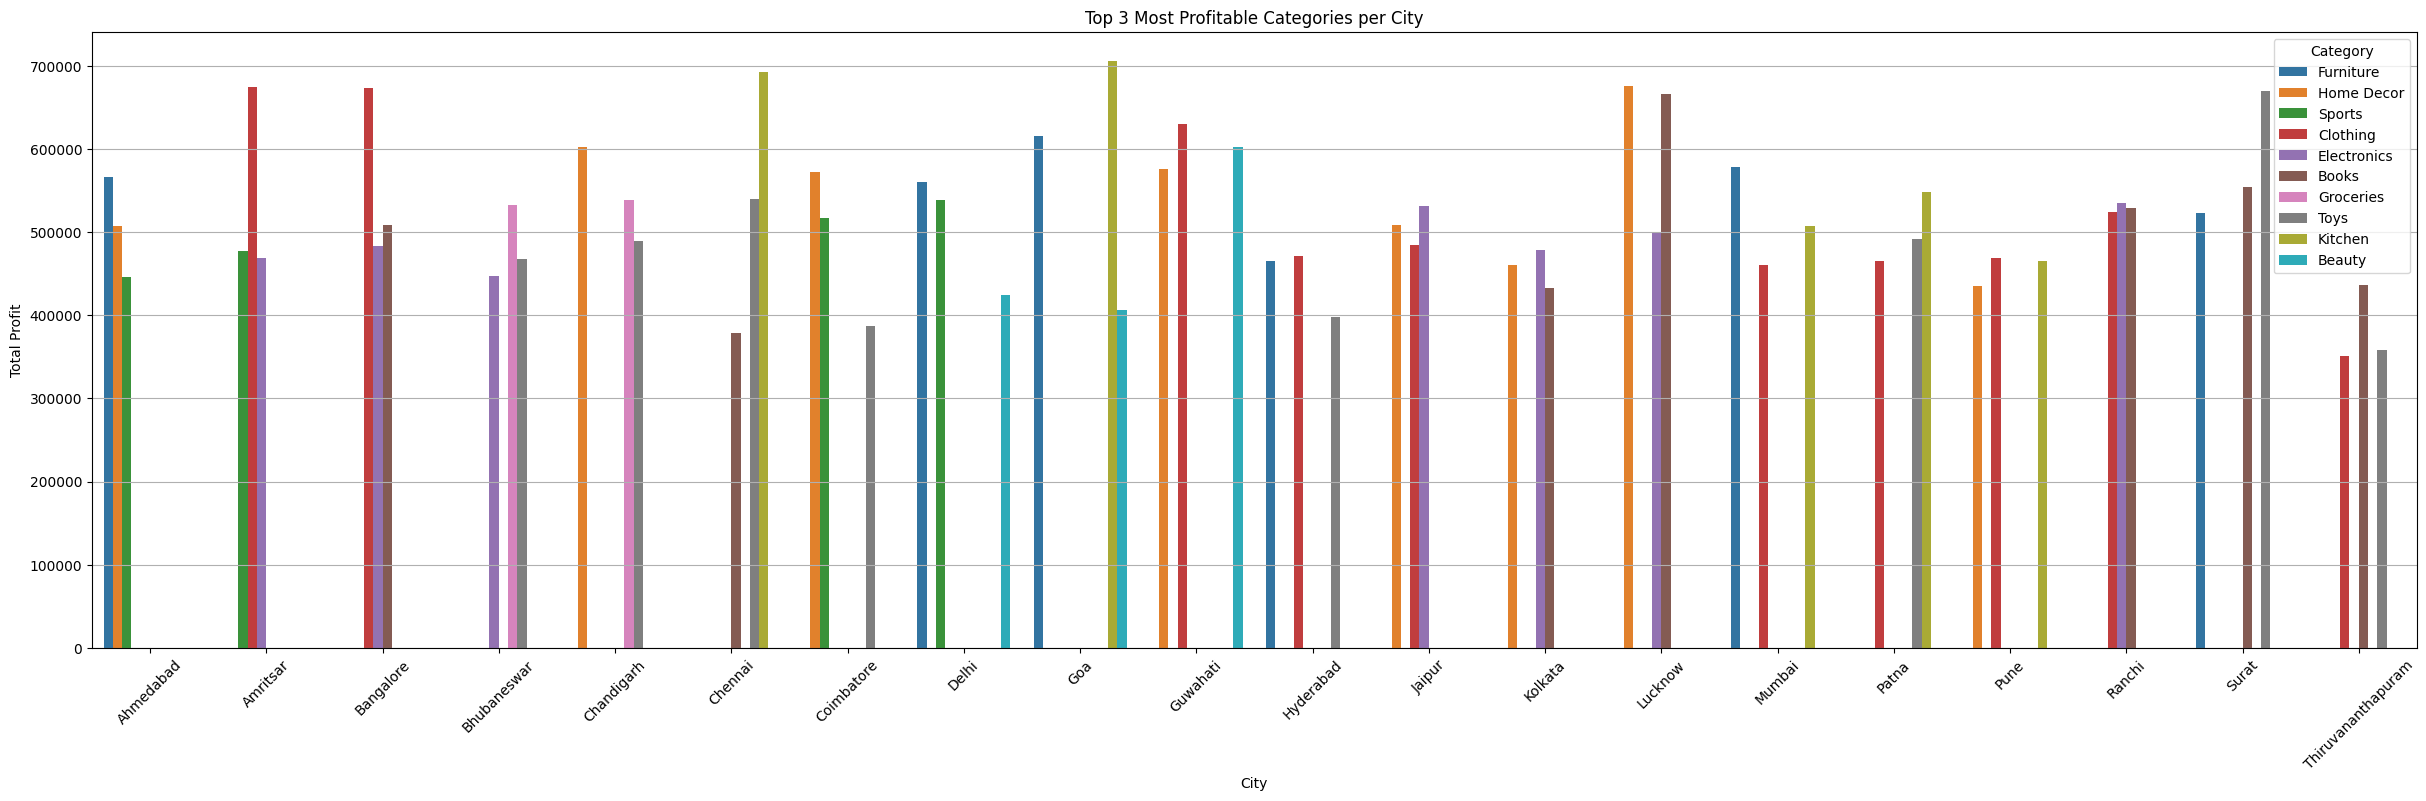

In [13]:
x = df.groupby(["City","Category"])["Profit"].sum().reset_index().sort_values(["City", "Profit"], ascending=[True, False])
top3_per_city = x.groupby("City").head(3).reset_index(drop=True)
print(top3_per_city)

# Plot
plt.figure(figsize=(30,8))
sns.barplot(
    data=top3_per_city,
    x="City",
    y="Profit",
    hue="Category",
    palette="tab10"
)
plt.title("Top 3 Most Profitable Categories per City")
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(axis="y")
plt.show() 


# Observations: City-wise Sales, Profit, and Top Categories

## 1. Overall Sales and Profit by City
- **Highest Total Sales:** Amritsar (28.75M), Bangalore (29.99M), Lucknow (29.90M)
- **Lowest Total Sales:** Thiruvananthapuram (20.40M)
- **Average Sales per Order:** Highest in Ranchi (17,654), lowest in Thiruvananthapuram (13,474)
- **Maximum Single Order Sales:** Bangalore (87,688) and Goa (89,688) have very high-value orders

## 2. Profit Analysis
- **Highest Total Profit:** Amritsar (28.75M), Ranchi (26.95M), Bangalore (29.99M)
- **Lowest Total Profit:** Thiruvananthapuram (20.40M)
- **Average Profit per Order:** Highest in Ranchi (115,659), lowest in Thiruvananthapuram (90,671)

## 3. Top 3 Most Profitable Categories per City
- **Ahmedabad:** Furniture, Home Decor, Sports
- **Amritsar:** Clothing, Sports, Electronics
- **Bangalore:** Clothing, Books, Electronics
- **Bhubaneswar:** Groceries, Toys, Electronics
- **Chandigarh:** Home Decor, Groceries, Toys
- **Chennai:** Kitchen, Toys, Books
- **Coimbatore:** Home Decor, Sports, Toys
- **Delhi:** Furniture, Sports, Beauty
- **Goa:** Kitchen, Furniture, Beauty
- **Guwahati:** Clothing, Beauty, Home Decor
- **Hyderabad:** Clothing, Furniture, Toys
- **Jaipur:** Electronics, Home Decor, Clothing
- **Kolkata:** Electronics, Home Decor, Books
- **Lucknow:** Home Decor, Books, Electronics
- **Mumbai:** Furniture, Kitchen, Clothing
- **Patna:** Kitchen, Toys, Clothing
- **Pune:** Clothing, Kitchen, Home Decor
- **Ranchi:** Electronics, Books, Clothing
- **Surat:** Toys, Books, Furniture
- **Thiruvananthapuram:** Books, Toys, Clothing


## Undersatand the categories of product

In [14]:
# lets undersatand the categories 
df["Category"].value_counts()


Category
Books          528
Kitchen        528
Furniture      527
Home Decor     515
Clothing       511
Sports         511
Toys           478
Electronics    472
Groceries      470
Beauty         460
Name: count, dtype: int64

      Category          mean         sum  count     min       max
0        Books  15295.972140  8076273.29    528   38.24  74951.75
1      Kitchen  14923.434261  7879573.29    528   44.57  87688.21
2    Furniture  16495.421309  8693087.03    527   19.12  80162.41
3   Home Decor  16615.236777  8556846.94    515   53.43  75345.21
4     Clothing  16527.887065  8445750.29    511   40.74  73960.76
5       Sports  15145.655656  7739430.04    511  132.58  69855.18
6         Toys  16708.936067  7986871.44    478   69.23  74227.75
7  Electronics  17038.419237  8042133.88    472  149.55  82804.05
8    Groceries  15053.899234  7075332.64    470   72.75  89688.44
9       Beauty  15681.382761  7213436.07    460   23.25  86486.30


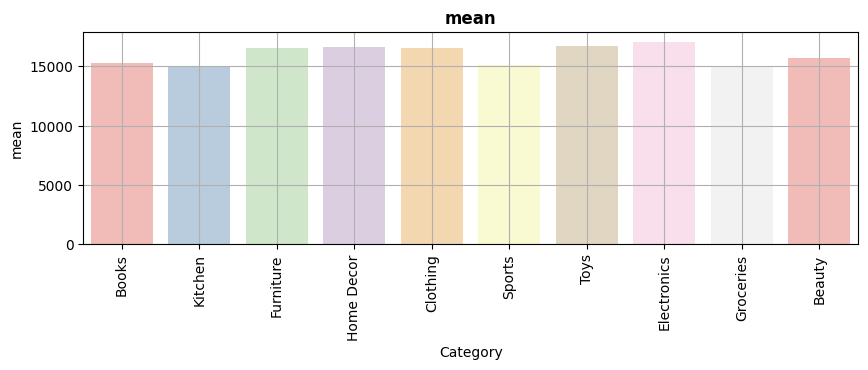

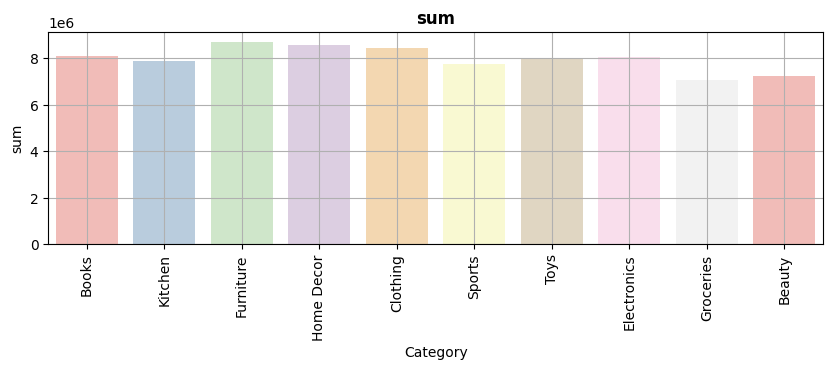

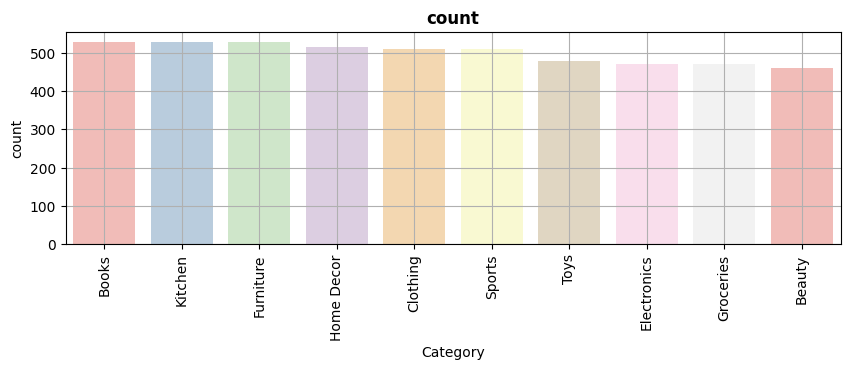

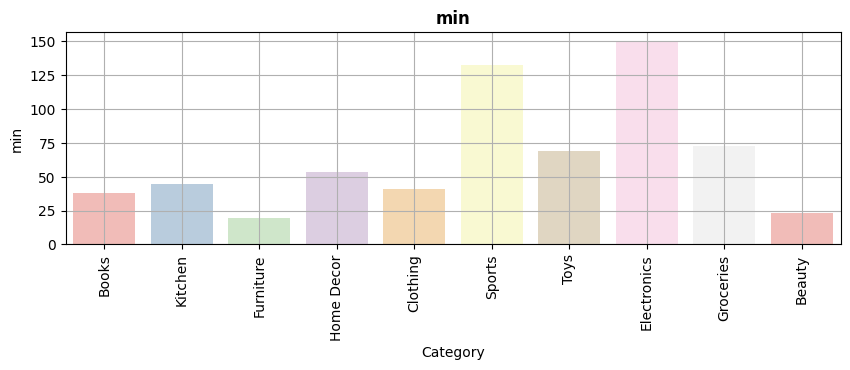

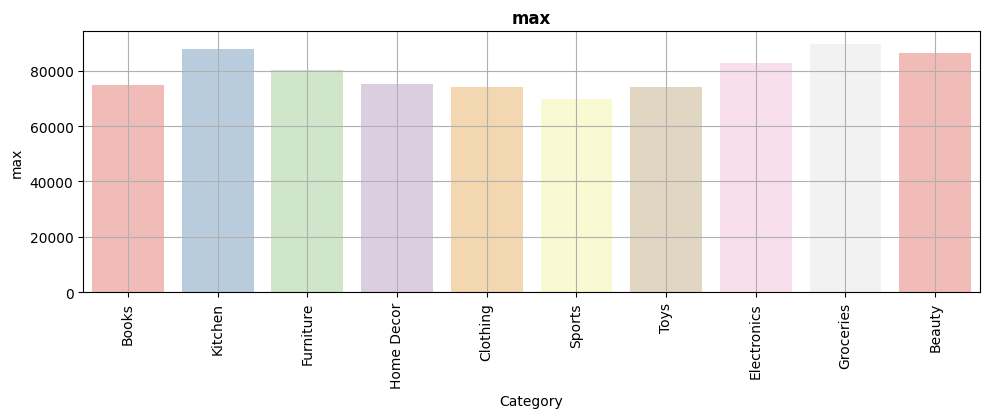

In [15]:
x = df.groupby("Category")["Profit"].agg(["mean","sum","count","min","max"]).sort_values(by = "count",ascending = False).reset_index()
print(x)
# lets plot the bar plot for easy understanding
for i,col in enumerate(x.drop(columns = "Category"),1):
    plt.figure(figsize = (10,16))
    plt.subplot(5,1,i)
    sns.barplot(x= "Category", y = col,data=x,palette = "Pastel1")
    plt.grid(True)
    plt.title(f"{col}",fontweight = 'bold')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [16]:
# lets undersatnd the subcategories in each categories
df.groupby("Category")["Sub-Category"].value_counts()

Category     Sub-Category 
Beauty       Face Cream       102
             Lipstick          95
             Foundation        92
             Shampoo           87
             Perfume           84
Books        Biography        116
             Non-Fiction      114
             Fiction          101
             Textbook         100
             Comics            97
Clothing     Women's Wear     118
             Kids Wear        100
             Men's Wear       100
             Shoes             98
             Accessories       95
Electronics  Smartwatch        97
             Headphones        96
             Camera            94
             Mobile            94
             Laptop            91
Furniture    Sofa             122
             Bed              117
             Cabinet           99
             Chair             95
             Table             94
Groceries    Spices            97
             Sugar             97
             Rice              94
             Oil     

In [17]:
x = df.groupby(["Category","Sub-Category"])["Profit"].agg(["mean","sum","count","min","max"]).sort_values(by = "mean",ascending = False).reset_index()
x

,Category,Sub-Category,mean,sum,count,min,max
0,Electronics,Headphones,19452.685417,1867457.80,96,380.11,82804.05
1,Home Decor,Lamp,19206.975470,2247216.13,117,319.05,75345.21
2,Furniture,Sofa,18892.612951,2304898.78,122,148.32,72215.26
3,Sports,Tennis Racket,18364.033019,1946587.50,106,357.47,69855.18
4,Kitchen,Mixer Grinder,18088.839894,1700350.95,94,44.57,87688.21
5,Clothing,Accessories,17918.234526,1702232.28,95,160.18,71420.71
6,Clothing,Men's Wear,17843.068200,1784306.82,100,222.91,73960.76
7,Electronics,Camera,17466.733617,1641872.96,94,223.69,76355.62
8,Toys,Doll,17402.608506,1514026.94,87,198.10,67363.85
9,Beauty,Perfume,17177.971786,1442949.63,84,866.73,72829.75


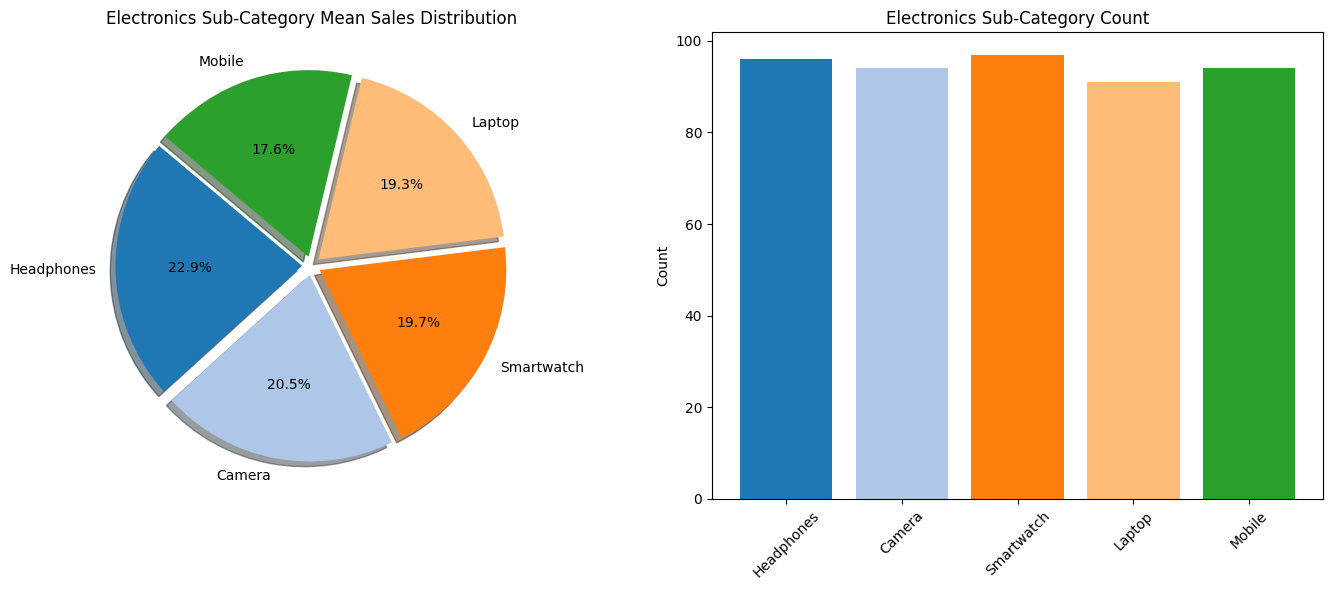

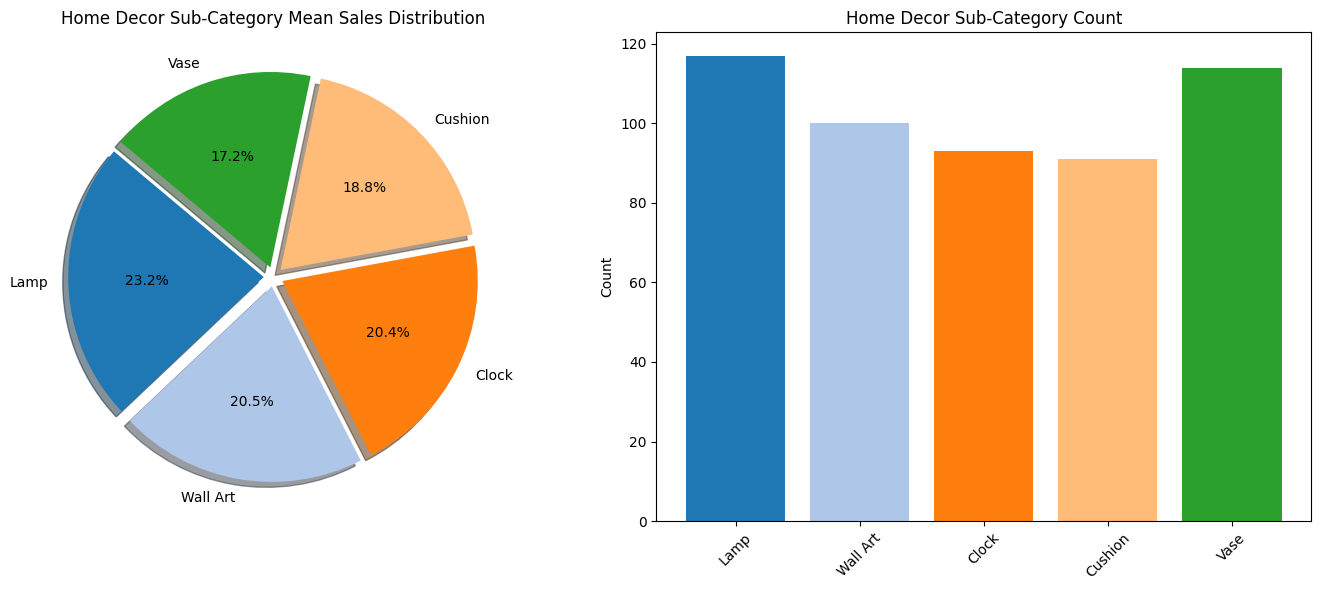

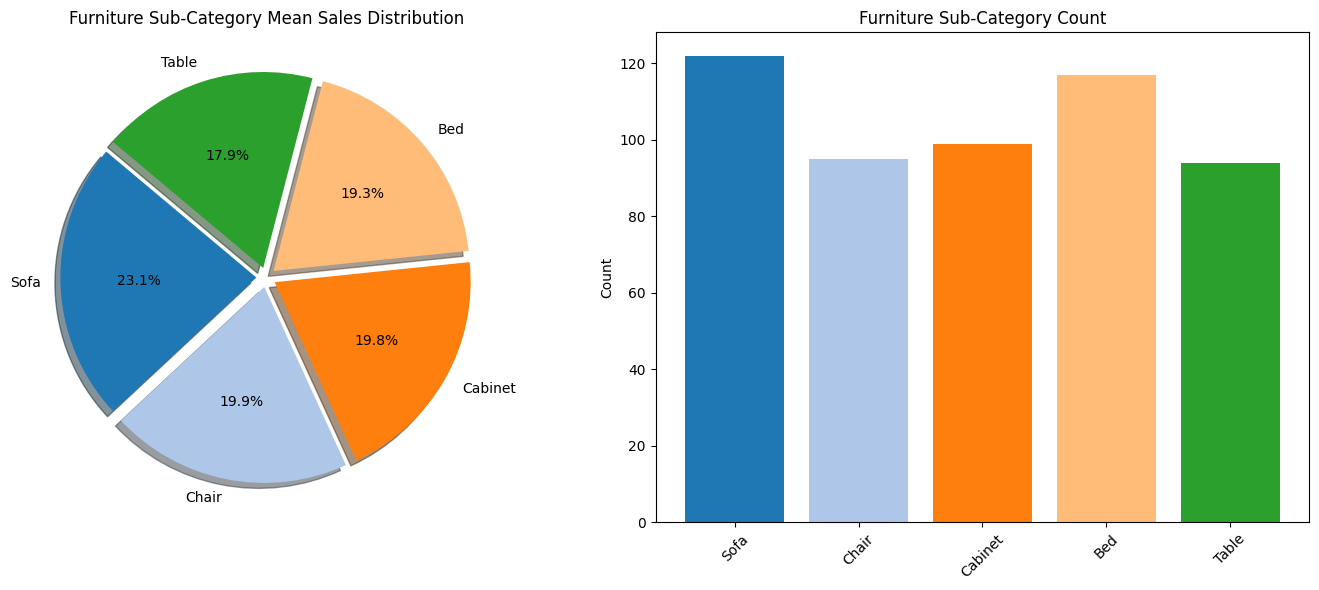

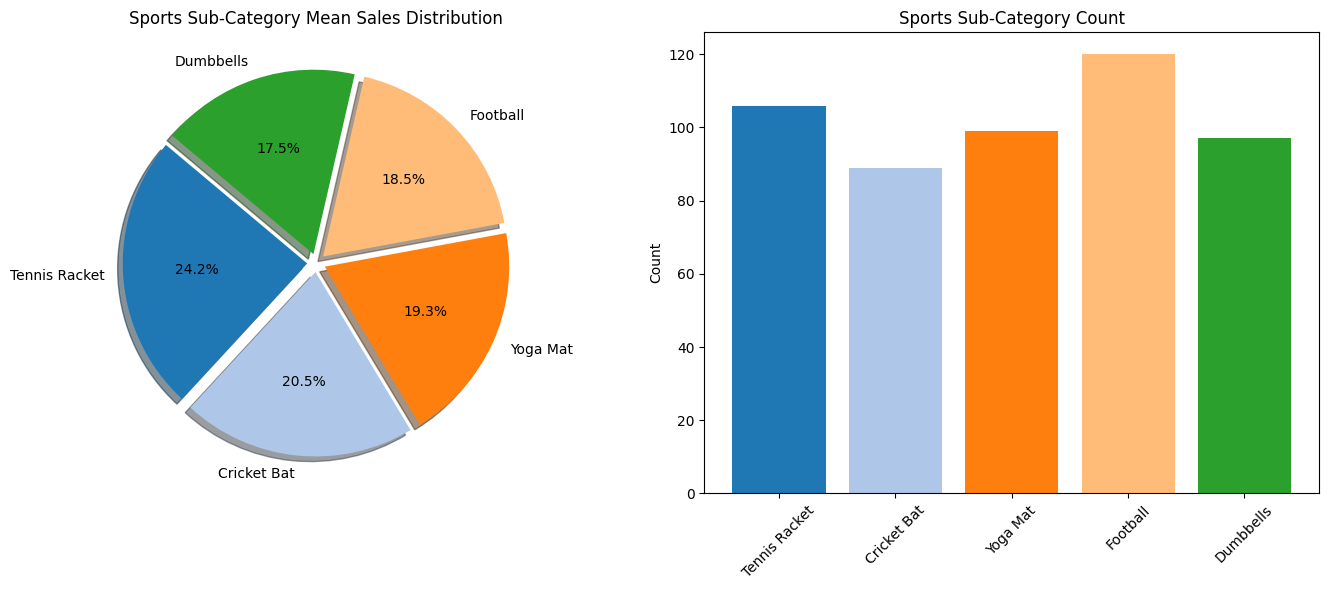

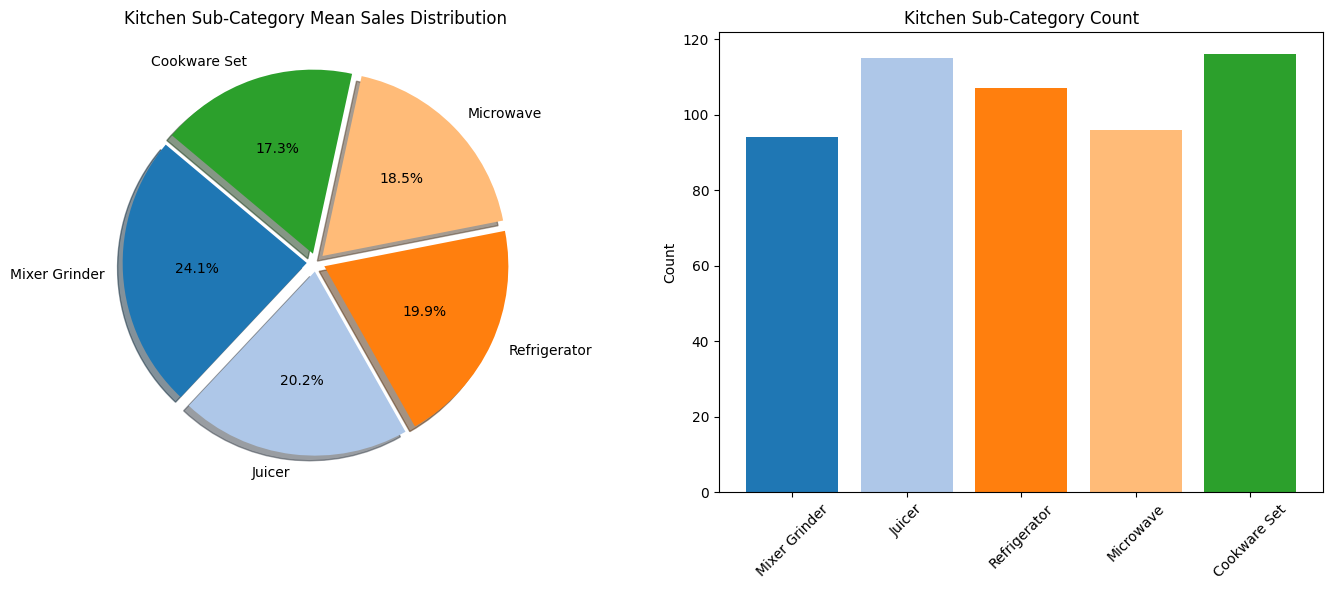

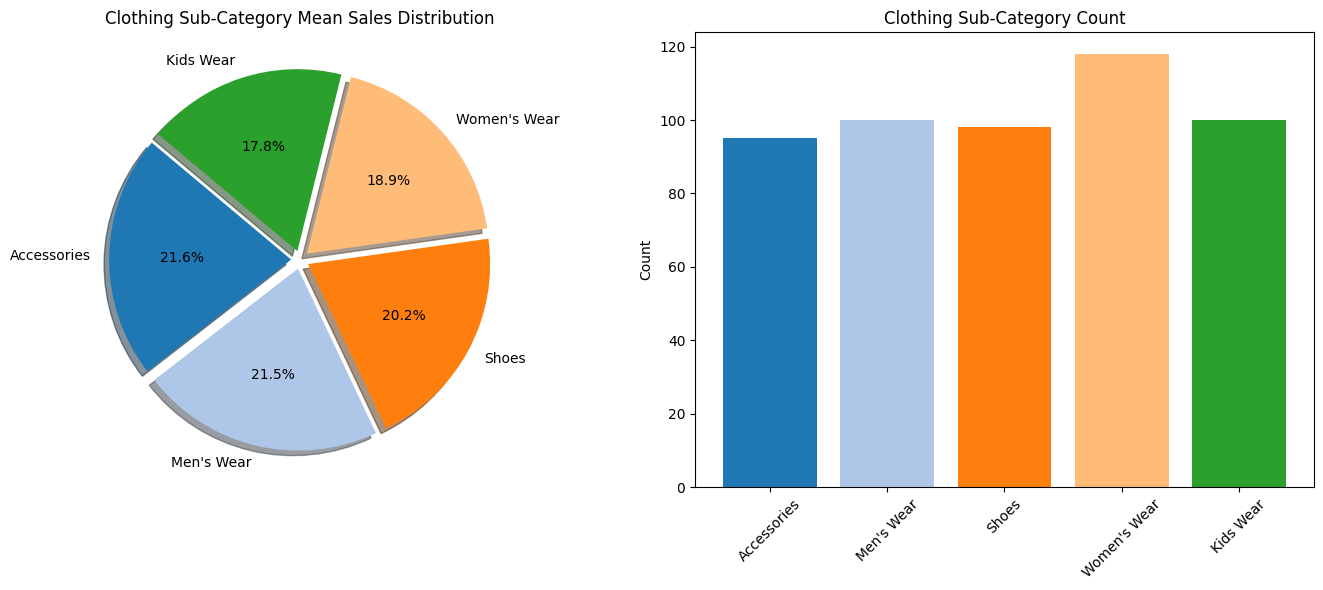

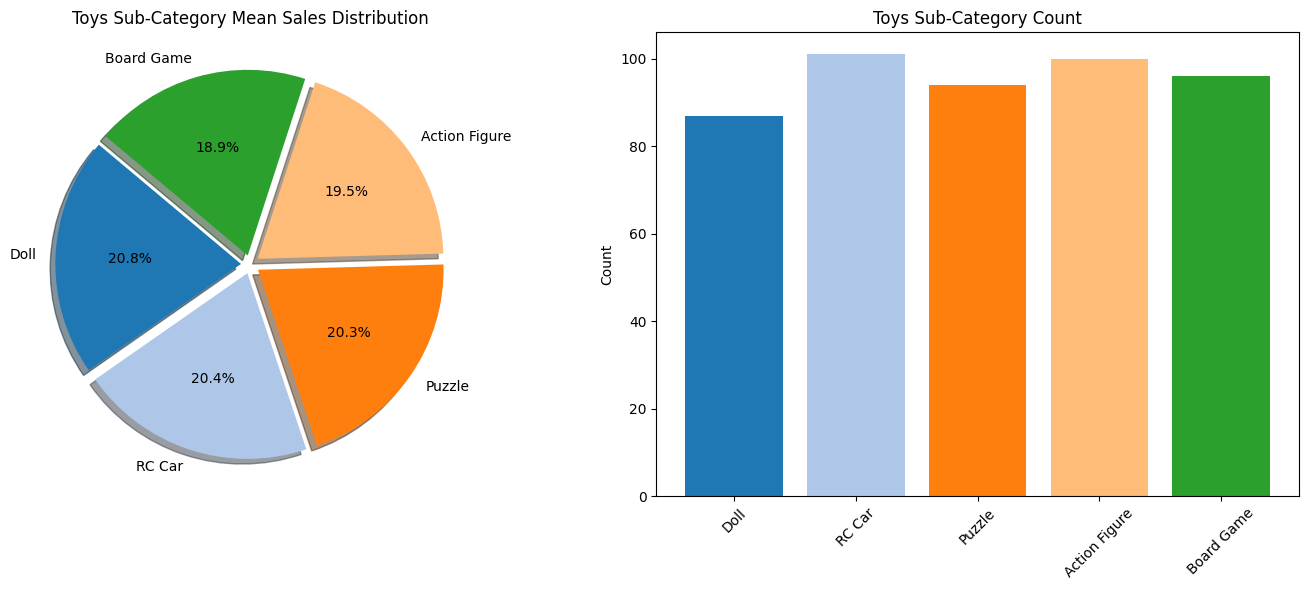

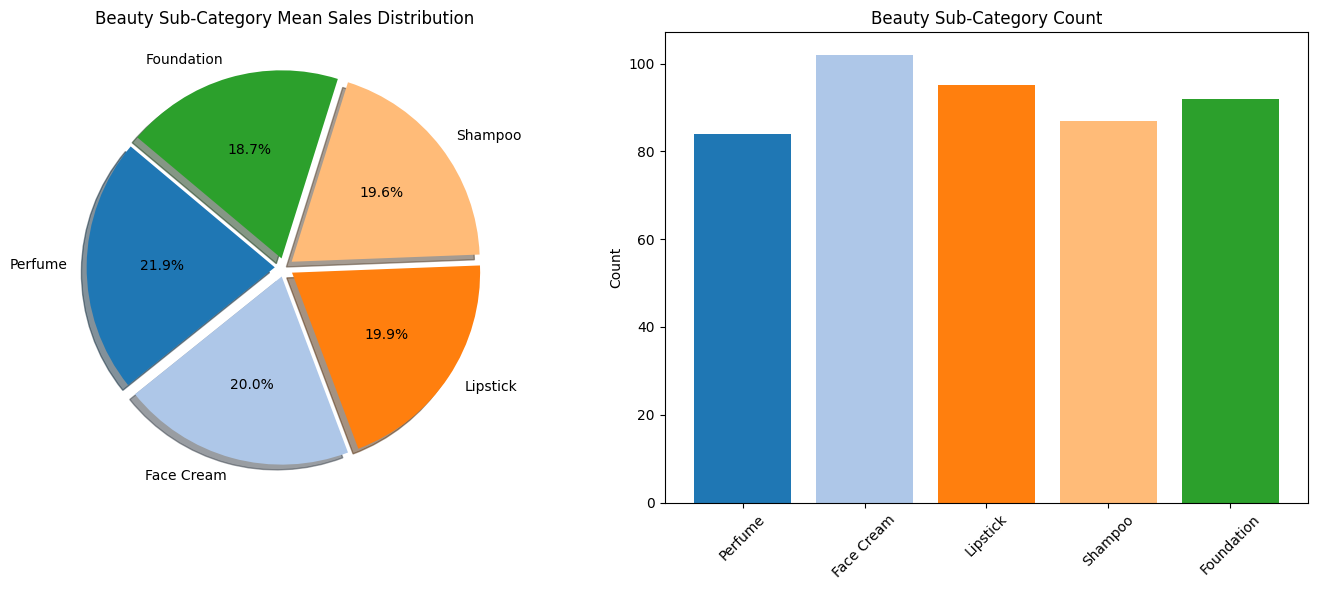

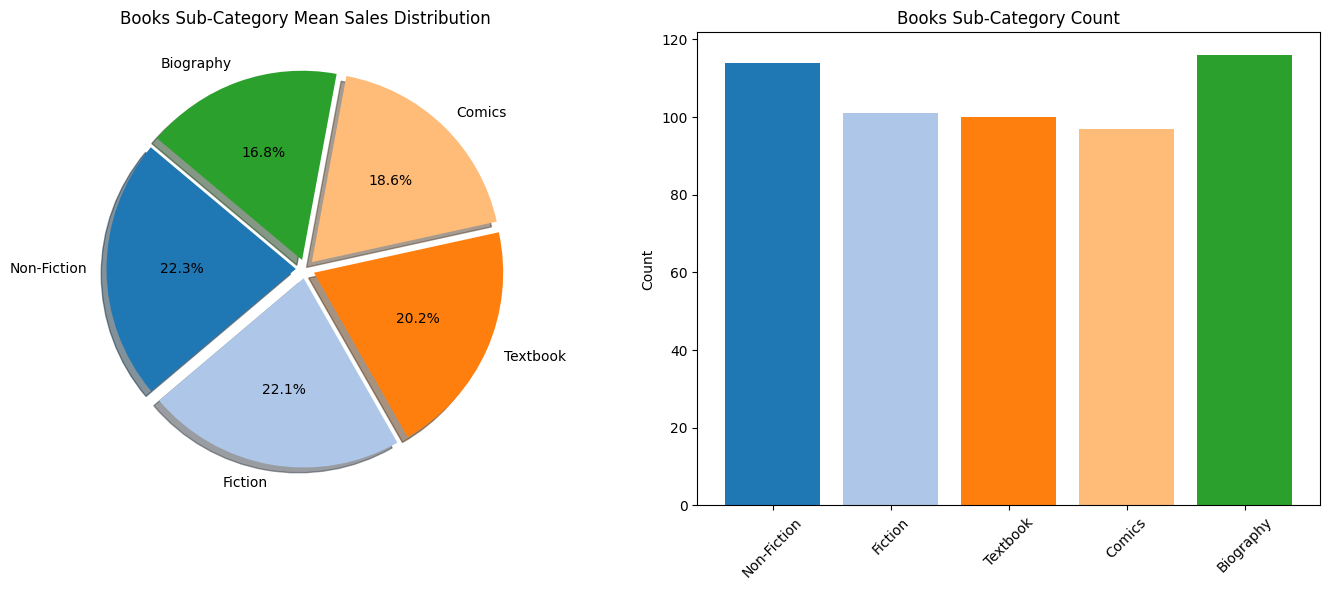

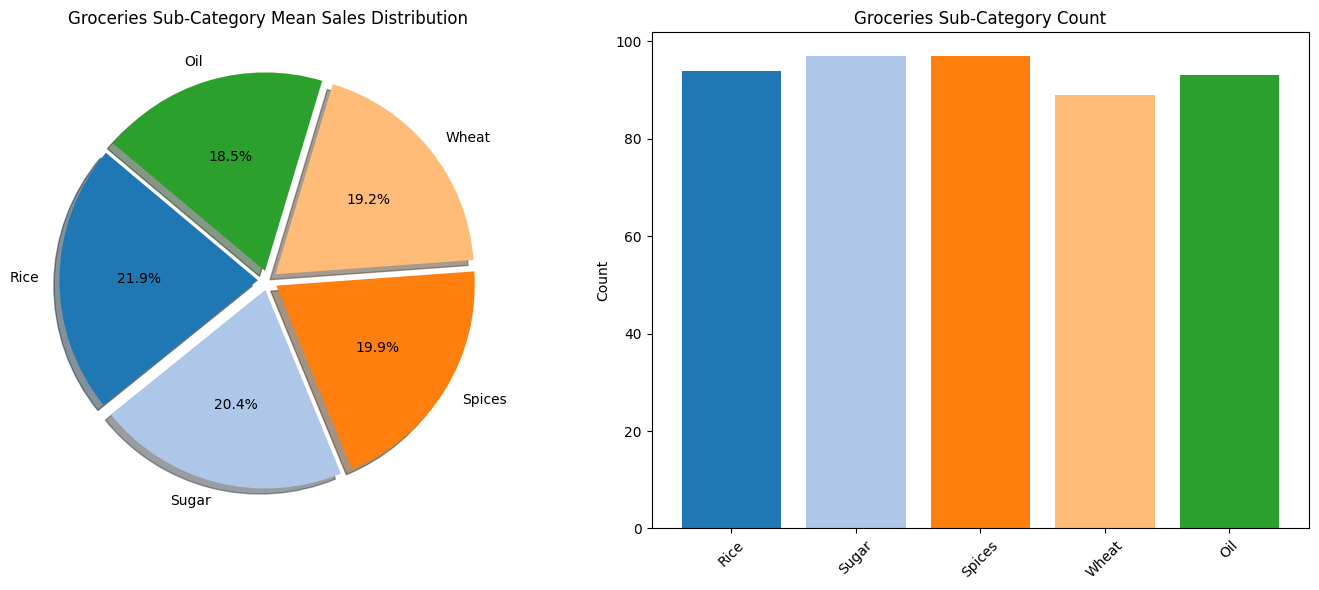

In [18]:
import matplotlib.pyplot as plt

categories = x['Category'].unique()

for cat in categories:
    data = x[x['Category'] == cat]
    
    plt.figure(figsize=(14,6))  # wide figure for 2 subplots

    # Pie chart
    plt.subplot(1,2,1)
    plt.pie(
        data['mean'],
        labels=data['Sub-Category'],
        autopct='%1.1f%%',
        startangle=140,
        explode=[0.05]*len(data),
        shadow=True,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"{cat} Sub-Category Mean Sales Distribution")

    # Count plot using plt.bar
    plt.subplot(1,2,2)
    plt.bar(data['Sub-Category'], data['count'], color=plt.cm.tab20.colors[:len(data)])
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title(f"{cat} Sub-Category Count")

    plt.tight_layout()
    plt.show()


# Observations: Sales and Profit Analysis by Category and Sub-Category

## 1. Overall Category Analysis
- **Top Categories by Count of Products:**
  - Books: 528 products
  - Kitchen: 528 products
  - Furniture: 527 products
  - Home Decor: 515 products
  - Clothing: 511 products
  - Sports: 511 products
  - Toys: 478 products
  - Electronics: 472 products
  - Groceries: 470 products
  - Beauty: 460 products

- **Sales Insights:**
  - Highest mean sales: Electronics (17,038), Toys (16,709), Clothing (16,528)
  - Highest total sales: Furniture (8,693,087), Home Decor (8,556,847), Electronics (8,042,134)
  - Maximum single order sales: Kitchen (87,688), Electronics (82,804), Beauty (86,486)
  - Minimum single order sales: Furniture (19.12), Beauty (23.25), Books (38.24)

- **Profit Insights:**
  - Categories like Electronics, Furniture, and Home Decor contribute high profit on average.
  - Beauty and Groceries have moderate total sales but individual products can have high profits.

## 2. Sub-Category Analysis
- **Beauty:** Face Cream (102), Lipstick (95), Foundation (92), Shampoo (87), Perfume (84)  
- **Books:** Biography (116), Non-Fiction (114), Fiction (101), Textbook (100), Comics (97)  
- **Clothing:** Women's Wear (118), Kids Wear (100), Men's Wear (100), Shoes (98), Accessories (95)  
- **Electronics:** Smartwatch (97), Headphones (96), Camera (94), Mobile (94), Laptop (91)  
- **Furniture:** Sofa (122), Bed (117), Cabinet (99), Chair (95), Table (94)  
- **Groceries:** Spices (97), Sugar (97), Rice (94), Oil (93), Wheat (89)  
- **Home Decor:** Lamp (117), Vase (114), Wall Art (100), Clock (93), Cushion (91)  
- **Kitchen:** Cookware Set (116), Juicer (115), Refrigerator (107), Microwave (96), Mixer Grinder (94)  
- **Sports:** Football (120), Tennis Racket (106), Yoga Mat (99), Dumbbells (97), Cricket Bat (89)  
- **Toys:** RC Car (101), Action Figure (100), Board Game (96), Puzzle (94), Doll (87)  

## 3. Sub-Category Sales Insights
- **Highest Mean Sales per Sub-Category:**
  - Electronics: Headphones (19,453)
  - Home Decor: Lamp (19,207)
  - Furniture: Sofa (18,893)
  - Sports: Tennis Racket (18,364)
  - Kitchen: Mixer Grinder (18,089)

- **Highest Total Sales per Sub-Category:**
  - Furniture: Sofa (2,304,898)
  - Home Decor: Lamp (2,247,216)
  - Clothing: Men's Wear (1,784,307)

- **Notable Observations:**
  - Some high-value products exist in categories with lower counts, e.g., Kitchen and Electronics.
  - Beauty products have moderate sales but wide variability (min 23.25, max 86,486), indicating niche high-value purchases.
  - Electronics and Home Decor consistently have high mean and total sales across sub-categories.

## 4. Overall Insights
- **Most Profitable Categories:** Electronics, Furniture, Home Decor
- **High Sales Variability:** Beauty, Kitchen, Electronics
- **Potential for Targeting:** Categories with fewer products but high mean sales (e.g., Electronics sub-categories) could be prioritized for marketing campaigns.


## Payment mode insighsts

Payment Mode
Net Banking    1010
COD            1005
Debit Card     1003
Credit Card     994
UPI             988
Name: count, dtype: int64


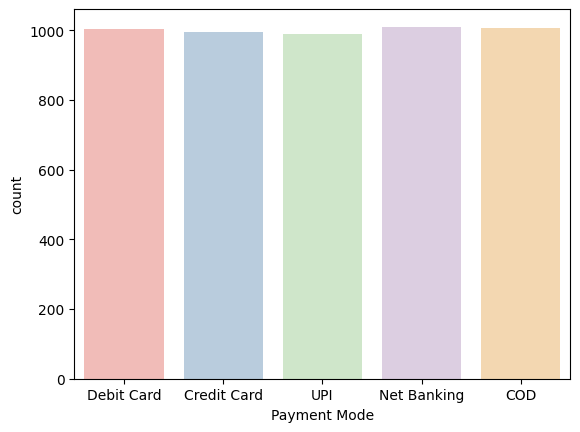

In [19]:
print(df["Payment Mode"].value_counts())
sns.countplot(x = "Payment Mode",data = df,palette = "Pastel1")
plt.show()


In [20]:
# lets understand the mode of payment in categories which mode is most used in which payment of which categories 
df.groupby("Category")["Payment Mode"].value_counts()

Category     Payment Mode
Beauty       Net Banking      96
             Debit Card       92
             UPI              92
             COD              91
             Credit Card      89
Books        Debit Card      118
             Credit Card     117
             COD             106
             Net Banking     101
             UPI              86
Clothing     UPI             109
             COD             108
             Net Banking     101
             Debit Card      100
             Credit Card      93
Electronics  Net Banking     106
             COD              95
             Credit Card      93
             Debit Card       91
             UPI              87
Furniture    Debit Card      134
             UPI             118
             Credit Card     100
             Net Banking      95
             COD              80
Groceries    Credit Card     104
             Debit Card       98
             Net Banking      90
             COD              89
             UPI 

# Observations & Suggestions: Payment Mode Analysis by Category

## 1. Overall Payment Mode Usage
- **Most used payment modes:**
  - Net Banking: 1,010 transactions
  - COD: 1,005 transactions
  - Debit Card: 1,003 transactions
  - Credit Card: 994 transactions
  - UPI: 988 transactions

- Insight: Customers are fairly evenly distributed across all payment modes, with Net Banking slightly leading.

---

## 2. Category-wise Payment Mode Preferences

| Category     | Most Preferred Mode | Least Preferred Mode | Notes |
|-------------|------------------|-------------------|-------|
| **Beauty**       | Net Banking (96)      | Credit Card (89)     | Net Banking and UPI dominate; Credit Card usage is lower. |
| **Books**        | Debit Card (118)     | UPI (86)             | Traditional card payments are preferred; digital wallets less popular. |
| **Clothing**     | UPI (109)            | Credit Card (93)     | UPI is most popular for Clothing; Credit Card least used. |
| **Electronics**  | Net Banking (106)    | UPI (87)             | Net Banking dominates for high-value Electronics purchases. |
| **Furniture**    | Debit Card (134)     | COD (80)             | Debit Card is dominant; COD less preferred, possibly due to high value. |
| **Groceries**    | Credit Card (104)    | UPI (89)             | Credit Card usage is high, suggesting preference for reward points. |
| **Home Decor**   | COD (114)            | Debit Card (92)      | COD is popular, indicating cautious buyers for Home Decor items. |
| **Kitchen**      | UPI (111)            | Net Banking (104)    | UPI is slightly more preferred; digital payments dominate. |
| **Sports**       | COD (113)            | Debit Card (82)      | COD still popular, likely for lower-risk, medium-value items. |
| **Toys**         | Net Banking (107)    | UPI (83)             | Net Banking preferred; UPI usage is low. |

---

## 3. Key Insights
- **High-value categories** (Electronics, Furniture) show preference for **Net Banking and Debit/Credit Cards**.  
- **Low to medium-value categories** (Toys, Home Decor, Sports) show significant **COD and UPI usage**.  
- **Digital payments (UPI)** are popular in Clothing and Kitchen, reflecting convenience for mid-value items.  
- **Credit Card usage** is moderately consistent across categories but tends to be lower in Beauty and Clothing.  

---

## 4. Suggestions
- **Offer incentives for preferred payment modes**:  
  - Provide discounts or cashback for Net Banking in Electronics & Toys.  
  - Promote UPI payments in Clothing and Kitchen for faster checkout.  
- **Encourage digital payments for COD-heavy categories**:  
  - Offer small discounts for switching from COD to UPI or Net Banking in Home Decor & Sports.  
- **Tailor marketing campaigns based on payment preference**:  
  - High-value Electronics buyers: Highlight secure Net Banking and card options.  
  - Medium-value categories: Promote convenience of UPI for repeat customers.  
- **Monitor underused payment modes**:  
  - Credit Card usage can be incentivized in Beauty and Clothing for higher sales and loyalty points.  


In [21]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year-Month
df['YearMonth'] = df['Order Date'].dt.to_period('M')  # e.g., 2024-10

monthly_data = df.groupby('YearMonth')[['Sales', 'Profit']].sum().reset_index()
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)  # for plotting
monthly_data



,YearMonth,Sales,Profit
0,2023-10,21307522.20,3106231.10
1,2023-11,22040269.20,3387740.08
2,2023-12,20624240.25,2989330.92
3,2024-01,21477241.40,3104253.86
4,2024-02,19853396.50,2941448.82
5,2024-03,21571015.35,3235674.53
6,2024-04,22214781.10,3241579.85
7,2024-05,24744786.55,3692958.55
8,2024-06,21368962.50,3261199.09
9,2024-07,24019283.90,3486946.19


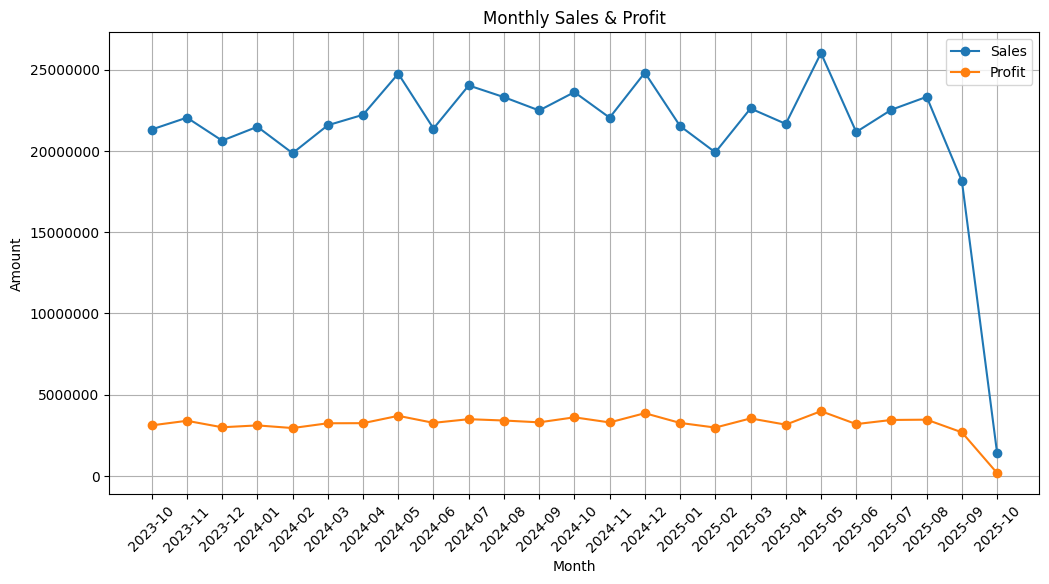

In [22]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(12,6))
plt.plot(monthly_data['YearMonth'], monthly_data['Sales'], marker='o', label='Sales')
plt.plot(monthly_data['YearMonth'], monthly_data['Profit'], marker='o', label='Profit')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Amount")
plt.title("Monthly Sales & Profit")
plt.legend()
plt.grid(True)

# Show full numbers on y-axis
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')  # avoids scientific notation

plt.show()



# Final Observations: Monthly Sales & Profit Analysis

## 1. Sales Trend 📈
- Sales fluctuate month-to-month but generally remain in the **20–26 million range**, indicating a stable revenue stream.  
- Peak sales months:
  - **May 2024**: 24.74M  
  - **December 2024**: 24.81M  
  - **May 2025**: 26.01M (highest overall)  
- Lowest sales months:
  - **September 2025**: 18.13M  
  - **October 2025**: 1.39M (likely incomplete data for the month)  

- Insight: Seasonal trends are noticeable, with **end-of-year months (Nov–Dec)** and **mid-year May** showing higher sales.

## 2. Profit Trend 💰
- Profit generally follows sales, ranging between **2.94M and 3.97M**.  
- Highest profits occur in **May 2025 (3.97M)** and **December 2024 (3.85M)**.  
- Lowest profits occur in **October 2025 (0.17M)**, likely due to incomplete data.  

- Observation: Profit margins remain fairly consistent with sales fluctuations, suggesting stable cost management.

## 3. Key Insights 🔑
- **Sales & profit are seasonally influenced**: Peaks in May and December may correlate with holidays, festivals, or promotional events.  
- **Recent months (Sep–Oct 2025)** show a sharp drop, highlighting a potential **data incompleteness or operational slowdown**.  
- **Profit-to-sales ratio** remains relatively stable, which is good for financial health.

---
 


THANKS IF YOU LIKE MY WORK PLEASE UPVOTE  